In [1]:
#

from math import sqrt
from numpy import concatenate
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from matplotlib import pyplot

In [34]:
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import tensorflow as tf
tf.random.set_seed(42)


import math

num_data = np.array([[0.5, 0.1], [0.3, 0.2], [0.7, 0.9],[0.8, 0.1]])
#(4, 2)
# array([[0.5, 0.1],
#        [0.3, 0.2],
#        [0.7, 0.9],
#        [0.8, 0.1]])

cat_data = np.array([[0], [1], [2], [0]])
#(4, 1)

one_hot_cat = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])
#(4, 3)

target = np.array([[0.1], [0.6], [0.4], [0.1]])
# (4, 1)

def get_trainable_variables(graph=tf.compat.v1.get_default_graph()):
    return [v for v in graph.get_collection(tf.compat.v1.GraphKeys.TRAINABLE_VARIABLES)]

def miniBatch(x, y, batchSize):
    numObs  = x.shape[0]
    batches = [] 
    batchNum = math.floor(numObs / batchSize)
    
    if numObs % batchSize == 0:
        for i in range(batchNum):
            xBatch = x[i * batchSize:(i + 1) * batchSize, :]
            yBatch = y[i * batchSize:(i + 1) * batchSize, :]
            batches.append((xBatch, yBatch))
    else:
        for i in range(batchNum):
            xBatch = x[i * batchSize:(i + 1) * batchSize, :]
            yBatch = y[i * batchSize:(i + 1) * batchSize, :]
            batches.append((xBatch, yBatch))
        xBatch = x[batchNum * batchSize:, :]
        yBatch = y[batchNum * batchSize:, :]
        batches.append((xBatch, yBatch))
    return batches

data = np.concatenate((num_data, one_hot_cat), axis = 1)
#(4, 5)

n_features = data.shape[1]
n_outputs = target.shape[1]
n_hidden = 3

tf.compat.v1.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope('Placeholders'):
        X = tf.compat.v1.placeholder('float', shape=[None, n_features])
        #<tf.Tensor 'Placeholder:0' shape=(?, 5) dtype=float32>
        y = tf.compat.v1.placeholder('float', shape=[None, n_outputs])
        #<tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>

    with tf.name_scope("First_Layer"):
        W_fc1 = tf.compat.v1.get_variable('First_Layer/Hidden_layer_weights', initializer=tf.constant(np.array([[0.19, 0.55, 0.76],[0.33, 0.16, 0.97],[0.4 , 0.35, 0.7 ],[0.51, 0.85, 0.85],[0.54, 0.49, 0.57]]), dtype=tf.float32))
        #<tf.Variable 'First_Layer/Variable:0' shape=(5, 3) dtype=float32_ref>
        b_fc1 = tf.compat.v1.get_variable('First_Layer/Biases', initializer=tf.constant(np.array([0.1, 0.1, 0.1]), dtype=tf.float32))
        #<tf.Variable 'First_Layer/Variable_1:0' shape=(3,) dtype=float32_ref>
        h_fc1 = tf.compat.v1.nn.sigmoid(tf.matmul(X, W_fc1) + b_fc1)
        #<tf.Tensor 'First_Layer/Relu:0' shape=(?, 3) dtype=float32>

    with tf.name_scope("Output_Layer"):
        W_fc2 = tf.compat.v1.get_variable('Output_Layer/Output_layer_weights', initializer=tf.constant(np.array([[ 0.10],[ 0.03],[-0.17]]), dtype=tf.float32))
        # <tf.Variable 'Output_Layer/Variable:0' shape=(3, 1) dtype=float32_ref>
        b_fc2 = tf.compat.v1.get_variable('Output_Layer/Biases', initializer=tf.constant(np.array([0.1]), dtype=tf.float32))
        # <tf.Variable 'Output_Layer/Variable_1:0' shape=(1,) dtype=float32_ref>
        y_pred = tf.compat.v1.cast(tf.matmul(h_fc1, W_fc2) + b_fc2, dtype = tf.float32)
        #<tf.Tensor 'Output_Layer/add:0' shape=(?, 1) dtype=float32>

    with tf.name_scope("Loss"):
        loss = tf.compat.v1.losses.mean_squared_error(labels = y, predictions = y_pred)

    with tf.name_scope('Train'):
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.5)
        grads_and_vars = optimizer.compute_gradients(loss)
        trainer = optimizer.apply_gradients(grads_and_vars)

    # [(<tf.Tensor 'Train/gradients/First_Layer/MatMul_grad/tuple/control_dependency_1:0' shape=(5, 3) dtype=float32>,
    #   <tf.Variable 'First_Layer/Variable:0' shape=(5, 3) dtype=float32_ref>),
    #  (<tf.Tensor 'Train/gradients/First_Layer/add_grad/tuple/control_dependency_1:0' shape=(3,) dtype=float32>,
    #   <tf.Variable 'First_Layer/Variable_1:0' shape=(3,) dtype=float32_ref>),
    #  (<tf.Tensor 'Train/gradients/Output_Layer/MatMul_grad/tuple/control_dependency_1:0' shape=(3, 1) dtype=float32>,
    #   <tf.Variable 'Output_Layer/Variable:0' shape=(3, 1) dtype=float32_ref>),
    #  (<tf.Tensor 'Train/gradients/Output_Layer/add_grad/tuple/control_dependency_1:0' shape=(1,) dtype=float32>,
    #   <tf.Variable 'Output_Layer/Variable_1:0' shape=(1,) dtype=float32_ref>)]

    with tf.name_scope("Init"):
        global_variables_init = tf.compat.v1.global_variables_initializer()
        
get_trainable_variables(graph=graph)
# [<tf.Variable 'First_Layer/Hidden_layer_weights:0' shape=(5, 3) dtype=float32_ref>,
#  <tf.Variable 'First_Layer/Biases:0' shape=(3,) dtype=float32_ref>,
#  <tf.Variable 'Output_Layer/Output_layer_weights:0' shape=(3, 1) dtype=float32_ref>,
#  <tf.Variable 'Output_Layer/Biases:0' shape=(1,) dtype=float32_ref>]

with tf.compat.v1.Session(graph=graph) as sess:
    global_variables_init.run()
    tf.compat.v1.get_default_graph().finalize()
    print("Initialized")
    
    print ("Variables before training")
    old_var = {}
    for var in tf.compat.v1.global_variables():
        old_var[var.name] = sess.run(var)
        #print (var.name, sess.run(var))
    print(old_var)
    print('\n\n')
    
    miniBatches = miniBatch(data, target, batchSize = 1)
    total_batch = len(miniBatches) 
    i=1
    for batch in miniBatches:
        print('\n{}-observation\n'.format(i))
        xBatch = batch[0]
        yBatch = batch[1]
        _, loss_val, h_fc1_val, grads_and_vars_val, y_pred_val = sess.run([trainer, loss, h_fc1, grads_and_vars, y_pred], feed_dict={X: xBatch, y: yBatch})
        print('Loss: {}'.format(loss_val))
        print('Prediction: {}'.format(y_pred_val))
        print('Hidden layer forward prop:{}'.format(h_fc1_val))
        print('\n\n')
        print(grads_and_vars_val)
        i += 1
    print("Optimization Finished!")   
    print('\n\n')
    print ("Variables after training")
    new_var = {}
    for var in tf.compat.v1.global_variables():
        new_var[var.name] = sess.run(var)
    print(new_var)

Initialized
Variables before training
{'First_Layer/Hidden_layer_weights:0': array([[0.19, 0.55, 0.76],
       [0.33, 0.16, 0.97],
       [0.4 , 0.35, 0.7 ],
       [0.51, 0.85, 0.85],
       [0.54, 0.49, 0.57]], dtype=float32), 'First_Layer/Biases:0': array([0.1, 0.1, 0.1], dtype=float32), 'Output_Layer/Output_layer_weights:0': array([[ 0.1 ],
       [ 0.03],
       [-0.17]], dtype=float32), 'Output_Layer/Biases:0': array([0.1], dtype=float32)}




1-observation

Loss: 0.002247666008770466
Prediction: [[0.05259044]]
Hidden layer forward prop:[[0.65203583 0.6772145  0.7819387 ]]



[(array([[-1.0756523e-03, -3.1090478e-04,  1.3742513e-03],
       [-2.1513047e-04, -6.2180960e-05,  2.7485026e-04],
       [-2.1513046e-03, -6.2180957e-04,  2.7485027e-03],
       [-0.0000000e+00, -0.0000000e+00,  0.0000000e+00],
       [-0.0000000e+00, -0.0000000e+00,  0.0000000e+00]], dtype=float32), array([[0.19, 0.55, 0.76],
       [0.33, 0.16, 0.97],
       [0.4 , 0.35, 0.7 ],
       [0.51, 0.85, 0.85],

In [38]:
print(data)

[[0.5 0.1 1.  0.  0. ]
 [0.3 0.2 0.  1.  0. ]
 [0.7 0.9 0.  0.  1. ]
 [0.8 0.1 1.  0.  0. ]]


In [5]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.347254   0.000000   0.133482   0.460036   0.019191   0.800473   
2   0.311365   0.022243   0.152132   0.484875   0.000000   0.741814   
3   0.327134   0.057566   0.151998   0.476351   0.035270   0.713632   
4   0.342469   0.061283   0.166047   0.490296   0.035010   0.684652   
5   0.361827   0.091094   0.195040   0.518430   0.105290   0.662584   

   var7(t-1)   var1(t)   var2(t)  
1   0.532252  0.311365  0.022243  
2   0.639917  0.327134  0.057566  
3   0.649324  0.342469  0.061283  
4   0.514890  0.361827  0.091094  
5   0.506562  0.380968  0.154510  


In [6]:
...
# split into train and test sets
values = reframed.values
n_train_hours = 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(24, 1, 8) (24,) (35, 1, 8) (35,)


Epoch 1/50
1/1 - 4s - loss: 0.2906 - val_loss: 0.6433 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.2775 - val_loss: 0.6272 - 27ms/epoch - 27ms/step
Epoch 3/50
1/1 - 0s - loss: 0.2645 - val_loss: 0.6112 - 21ms/epoch - 21ms/step
Epoch 4/50
1/1 - 0s - loss: 0.2515 - val_loss: 0.5953 - 20ms/epoch - 20ms/step
Epoch 5/50
1/1 - 0s - loss: 0.2386 - val_loss: 0.5793 - 21ms/epoch - 21ms/step
Epoch 6/50
1/1 - 0s - loss: 0.2256 - val_loss: 0.5635 - 22ms/epoch - 22ms/step
Epoch 7/50
1/1 - 0s - loss: 0.2127 - val_loss: 0.5484 - 19ms/epoch - 19ms/step
Epoch 8/50
1/1 - 0s - loss: 0.1997 - val_loss: 0.5332 - 22ms/epoch - 22ms/step
Epoch 9/50
1/1 - 0s - loss: 0.1867 - val_loss: 0.5180 - 24ms/epoch - 24ms/step
Epoch 10/50
1/1 - 0s - loss: 0.1742 - val_loss: 0.5028 - 19ms/epoch - 19ms/step
Epoch 11/50
1/1 - 0s - loss: 0.1621 - val_loss: 0.4876 - 21ms/epoch - 21ms/step
Epoch 12/50
1/1 - 0s - loss: 0.1500 - val_loss: 0.4724 - 22ms/epoch - 22ms/step
Epoch 13/50
1/1 - 0s - loss: 0.1379 - val_loss: 0.457

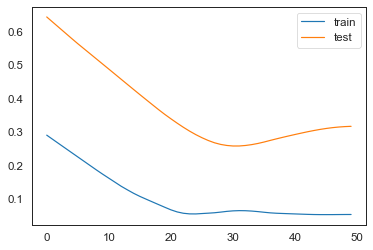

In [7]:
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import math
from sklearn.preprocessing import MinMaxScaler
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [12]:
...
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.347254   0.000000   0.133482   0.460036   0.019191   0.800473   
2   0.311365   0.022243   0.152132   0.484875   0.000000   0.741814   
3   0.327134   0.057566   0.151998   0.476351   0.035270   0.713632   
4   0.342469   0.061283   0.166047   0.490296   0.035010   0.684652   
5   0.361827   0.091094   0.195040   0.518430   0.105290   0.662584   

   var7(t-1)   var1(t)   var2(t)  
1   0.532252  0.311365  0.022243  
2   0.639917  0.327134  0.057566  
3   0.649324  0.342469  0.061283  
4   0.514890  0.361827  0.091094  
5   0.506562  0.380968  0.154510  
(50, 1, 8) (50,) (9, 1, 8) (9,)
Epoch 1/50
1/1 - 2s - loss: 0.2543 - val_loss: 0.7358 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.2424 - val_loss: 0.7175 - 21ms/epoch - 21ms/step
Epoch 3/50
1/1 - 0s - loss: 0.2307 - val_loss: 0.6990 - 20ms/epoch - 20ms/step
Epoch 4/50
1/1 - 0s - loss: 0.2192 - val_loss: 0.6804 - 22ms/epoch - 22ms/step
Epoch 5/50
1/1 - 0s

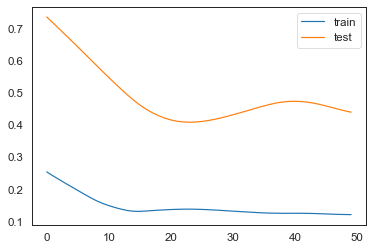

ValueError: operands could not be broadcast together with shapes (9,8) (7,) (9,8) 

In [11]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 50
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(57, 28)
[0.9661609  0.87901986 0.9999999  0.92130005 0.84045947 0.89171636
 0.78074586]
(50, 18) 50 (50,)
(50, 3, 6) (50,) (7, 3, 6) (7,)
Epoch 1/600
1/1 - 2s - loss: 0.4095 - 2s/epoch - 2s/step
Epoch 2/600
1/1 - 0s - loss: 0.3792 - 3ms/epoch - 3ms/step
Epoch 3/600
1/1 - 0s - loss: 0.3491 - 3ms/epoch - 3ms/step
Epoch 4/600
1/1 - 0s - loss: 0.3201 - 4ms/epoch - 4ms/step
Epoch 5/600
1/1 - 0s - loss: 0.2926 - 3ms/epoch - 3ms/step
Epoch 6/600
1/1 - 0s - loss: 0.2650 - 4ms/epoch - 4ms/step
Epoch 7/600
1/1 - 0s - loss: 0.2382 - 4ms/epoch - 4ms/step
Epoch 8/600
1/1 - 0s - loss: 0.2123 - 3ms/epoch - 3ms/step
Epoch 9/600
1/1 - 0s - loss: 0.1871 - 4ms/epoch - 4ms/step
Epoch 10/600
1/1 - 0s - loss: 0.1667 - 3ms/epoch - 3ms/step
Epoch 11/600
1/1 - 0s - loss: 0.1539 - 4ms/epoch - 4ms/step
Epoch 12/600
1/1 - 0s - loss: 0.1445 - 4ms/epoch - 4ms/step
Epoch 13/600
1/1 - 0s - loss: 0.1408 - 4ms/epoch - 4ms/step
Epoch 14/600
1/1 - 0s - loss: 0.1451 - 4ms/epoch - 4ms/step
Epoch 15/600
1/1 - 0s - loss: 0.

Epoch 135/600
1/1 - 0s - loss: 0.0647 - 3ms/epoch - 3ms/step
Epoch 136/600
1/1 - 0s - loss: 0.0645 - 4ms/epoch - 4ms/step
Epoch 137/600
1/1 - 0s - loss: 0.0642 - 3ms/epoch - 3ms/step
Epoch 138/600
1/1 - 0s - loss: 0.0640 - 3ms/epoch - 3ms/step
Epoch 139/600
1/1 - 0s - loss: 0.0638 - 5ms/epoch - 5ms/step
Epoch 140/600
1/1 - 0s - loss: 0.0635 - 3ms/epoch - 3ms/step
Epoch 141/600
1/1 - 0s - loss: 0.0632 - 4ms/epoch - 4ms/step
Epoch 142/600
1/1 - 0s - loss: 0.0630 - 3ms/epoch - 3ms/step
Epoch 143/600
1/1 - 0s - loss: 0.0627 - 3ms/epoch - 3ms/step
Epoch 144/600
1/1 - 0s - loss: 0.0624 - 3ms/epoch - 3ms/step
Epoch 145/600
1/1 - 0s - loss: 0.0622 - 3ms/epoch - 3ms/step
Epoch 146/600
1/1 - 0s - loss: 0.0619 - 3ms/epoch - 3ms/step
Epoch 147/600
1/1 - 0s - loss: 0.0617 - 3ms/epoch - 3ms/step
Epoch 148/600
1/1 - 0s - loss: 0.0616 - 3ms/epoch - 3ms/step
Epoch 149/600
1/1 - 0s - loss: 0.0614 - 3ms/epoch - 3ms/step
Epoch 150/600
1/1 - 0s - loss: 0.0612 - 4ms/epoch - 4ms/step
Epoch 151/600
1/1 - 0s -

Epoch 270/600
1/1 - 0s - loss: 0.0528 - 4ms/epoch - 4ms/step
Epoch 271/600
1/1 - 0s - loss: 0.0528 - 4ms/epoch - 4ms/step
Epoch 272/600
1/1 - 0s - loss: 0.0529 - 4ms/epoch - 4ms/step
Epoch 273/600
1/1 - 0s - loss: 0.0532 - 5ms/epoch - 5ms/step
Epoch 274/600
1/1 - 0s - loss: 0.0525 - 4ms/epoch - 4ms/step
Epoch 275/600
1/1 - 0s - loss: 0.0534 - 3ms/epoch - 3ms/step
Epoch 276/600
1/1 - 0s - loss: 0.0525 - 4ms/epoch - 4ms/step
Epoch 277/600
1/1 - 0s - loss: 0.0528 - 4ms/epoch - 4ms/step
Epoch 278/600
1/1 - 0s - loss: 0.0529 - 4ms/epoch - 4ms/step
Epoch 279/600
1/1 - 0s - loss: 0.0525 - 4ms/epoch - 4ms/step
Epoch 280/600
1/1 - 0s - loss: 0.0538 - 4ms/epoch - 4ms/step
Epoch 281/600
1/1 - 0s - loss: 0.0529 - 3ms/epoch - 3ms/step
Epoch 282/600
1/1 - 0s - loss: 0.0527 - 3ms/epoch - 3ms/step
Epoch 283/600
1/1 - 0s - loss: 0.0534 - 3ms/epoch - 3ms/step
Epoch 284/600
1/1 - 0s - loss: 0.0524 - 3ms/epoch - 3ms/step
Epoch 285/600
1/1 - 0s - loss: 0.0529 - 3ms/epoch - 3ms/step
Epoch 286/600
1/1 - 0s -

Epoch 405/600
1/1 - 0s - loss: 0.0501 - 4ms/epoch - 4ms/step
Epoch 406/600
1/1 - 0s - loss: 0.0492 - 4ms/epoch - 4ms/step
Epoch 407/600
1/1 - 0s - loss: 0.0505 - 4ms/epoch - 4ms/step
Epoch 408/600
1/1 - 0s - loss: 0.0503 - 4ms/epoch - 4ms/step
Epoch 409/600
1/1 - 0s - loss: 0.0493 - 4ms/epoch - 4ms/step
Epoch 410/600
1/1 - 0s - loss: 0.0501 - 3ms/epoch - 3ms/step
Epoch 411/600
1/1 - 0s - loss: 0.0496 - 4ms/epoch - 4ms/step
Epoch 412/600
1/1 - 0s - loss: 0.0502 - 4ms/epoch - 4ms/step
Epoch 413/600
1/1 - 0s - loss: 0.0491 - 3ms/epoch - 3ms/step
Epoch 414/600
1/1 - 0s - loss: 0.0501 - 3ms/epoch - 3ms/step
Epoch 415/600
1/1 - 0s - loss: 0.0490 - 4ms/epoch - 4ms/step
Epoch 416/600
1/1 - 0s - loss: 0.0497 - 4ms/epoch - 4ms/step
Epoch 417/600
1/1 - 0s - loss: 0.0493 - 3ms/epoch - 3ms/step
Epoch 418/600
1/1 - 0s - loss: 0.0497 - 4ms/epoch - 4ms/step
Epoch 419/600
1/1 - 0s - loss: 0.0489 - 3ms/epoch - 3ms/step
Epoch 420/600
1/1 - 0s - loss: 0.0497 - 3ms/epoch - 3ms/step
Epoch 421/600
1/1 - 0s -

Epoch 540/600
1/1 - 0s - loss: 0.0473 - 3ms/epoch - 3ms/step
Epoch 541/600
1/1 - 0s - loss: 0.0470 - 3ms/epoch - 3ms/step
Epoch 542/600
1/1 - 0s - loss: 0.0474 - 3ms/epoch - 3ms/step
Epoch 543/600
1/1 - 0s - loss: 0.0475 - 3ms/epoch - 3ms/step
Epoch 544/600
1/1 - 0s - loss: 0.0473 - 3ms/epoch - 3ms/step
Epoch 545/600
1/1 - 0s - loss: 0.0474 - 3ms/epoch - 3ms/step
Epoch 546/600
1/1 - 0s - loss: 0.0471 - 3ms/epoch - 3ms/step
Epoch 547/600
1/1 - 0s - loss: 0.0471 - 3ms/epoch - 3ms/step
Epoch 548/600
1/1 - 0s - loss: 0.0473 - 4ms/epoch - 4ms/step
Epoch 549/600
1/1 - 0s - loss: 0.0470 - 4ms/epoch - 4ms/step
Epoch 550/600
1/1 - 0s - loss: 0.0472 - 4ms/epoch - 4ms/step
Epoch 551/600
1/1 - 0s - loss: 0.0475 - 3ms/epoch - 3ms/step
Epoch 552/600
1/1 - 0s - loss: 0.0475 - 4ms/epoch - 4ms/step
Epoch 553/600
1/1 - 0s - loss: 0.0469 - 4ms/epoch - 4ms/step
Epoch 554/600
1/1 - 0s - loss: 0.0471 - 3ms/epoch - 3ms/step
Epoch 555/600
1/1 - 0s - loss: 0.0479 - 4ms/epoch - 4ms/step
Epoch 556/600
1/1 - 0s -

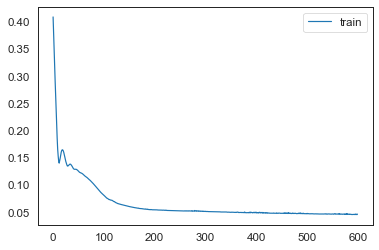

Test RMSE: 9.218


In [22]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 6
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train_hours = 50
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(test_y)
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=600, batch_size=72, verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)